In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nasdaq_etf = pd.read_excel("./data/data1.xlsx", skiprows=4, usecols=[2, 3], names=["Date", "NASDAQ_Returns"])
nasdaq_etf["NASDAQ_Returns"] = pd.to_numeric(nasdaq_etf["NASDAQ_Returns"], errors="coerce")
nasdaq_etf["Date"] = pd.to_datetime(nasdaq_etf["Date"], errors="coerce")
nasdaq_etf = nasdaq_etf.dropna().reset_index(drop=True)
nasdaq_etf

,Date,NASDAQ_Returns
0,2010-02-28,4.54
1,2010-03-31,7.66
2,2010-04-30,2.16
3,2010-05-31,-7.35
4,2010-06-30,-6.10
...,...,...
172,2024-06-30,6.22
173,2024-07-31,-1.63
174,2024-08-31,1.14
175,2024-09-30,2.53


In [4]:
em_etf = pd.read_excel("./data/data1.xlsx", skiprows=4, usecols=[0, 1], names=["Date", "MSCI_Returns"])
em_etf["MSCI_Returns"] = pd.to_numeric(em_etf["MSCI_Returns"], errors="coerce")
em_etf["Date"] = pd.to_datetime(em_etf["Date"], errors="coerce")
em_etf = em_etf.dropna().reset_index(drop=True)
em_etf

,Date,MSCI_Returns
0,2003-05-31,8.19
1,2003-06-30,4.86
2,2003-07-31,5.93
3,2003-08-31,7.11
4,2003-09-30,0.65
...,...,...
253,2024-06-30,3.10
254,2024-07-31,0.70
255,2024-08-31,0.99
256,2024-09-30,5.73


In [5]:
bond_etf = pd.read_excel("./data/data1.xlsx", skiprows=4, usecols=[8, 9], names=["Date", "BOND_Returns"])
bond_etf["BOND_Returns"] = pd.to_numeric(bond_etf["BOND_Returns"], errors="coerce")
bond_etf["Date"] = pd.to_datetime(bond_etf["Date"], errors="coerce")
bond_etf = bond_etf.dropna().reset_index(drop=True)
bond_etf

,Date,BOND_Returns
0,2003-10-31,-0.96
1,2003-11-30,0.22
2,2003-12-31,1.03
3,2004-01-31,0.77
4,2004-02-29,1.05
...,...,...
287,2024-06-30,2.00
288,2024-07-31,7.45
289,2024-08-31,5.45
290,2024-09-30,3.18


In [6]:
data = pd.merge(nasdaq_etf, em_etf, on="Date", how="inner")
data = pd.merge(data, bond_etf, on="Date", how="inner")
data

,Date,NASDAQ_Returns,MSCI_Returns,BOND_Returns
0,2010-02-28,4.54,0.41,0.33
1,2010-03-31,7.66,7.93,-0.12
2,2010-04-30,2.16,0.71,1.05
3,2010-05-31,-7.35,-9.70,0.83
4,2010-06-30,-6.10,-0.55,1.65
...,...,...,...,...
211,2024-08-31,1.14,0.99,5.45
212,2024-09-30,2.53,5.73,1.34
213,2024-09-30,2.53,5.73,3.18
214,2024-10-31,-0.85,-3.58,-2.48


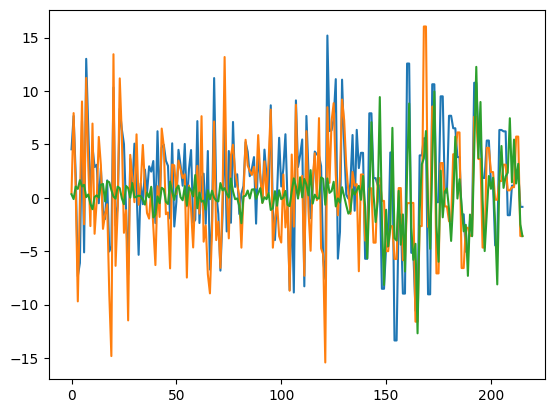

In [7]:
plt.plot(data.NASDAQ_Returns)
plt.plot(data.MSCI_Returns)
plt.plot(data.BOND_Returns)
# plt.plot(data.SP500_Returns)

In [8]:
data.describe()

,NASDAQ_Returns,MSCI_Returns,BOND_Returns
count,216.000000,216.000000,216.000000
mean,1.449491,0.293935,0.197130
std,5.269086,5.107867,2.853881
min,-13.360000,-15.420000,-12.690000
25%,-1.637500,-2.780000,-0.640000
50%,1.860000,0.375000,0.125000
75%,5.045000,3.100000,1.062500
max,15.190000,16.040000,12.260000


In [9]:
data.corr()
# NASDAQ and MSCI is correlated

/var/folders/pl/y0__kl1j73g_lg4xxddrtzgh0000gn/T/ipykernel_4593/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,NASDAQ_Returns,MSCI_Returns,BOND_Returns
NASDAQ_Returns,1.000000,0.658293,0.456417
MSCI_Returns,0.658293,1.000000,0.367289
BOND_Returns,0.456417,0.367289,1.000000


In [51]:
# Sharpe ratio over the years
print((data["NASDAQ_Returns"].mean() - 0.02) / data["NASDAQ_Returns"].std())
print((data["MSCI_Returns"].mean() - 0.02) / data["MSCI_Returns"].std())
print((data["BOND_Returns"].mean() - 0.02) / data["BOND_Returns"].std())
# print(data["SP500_Returns"].mean() / data["SP500_Returns"].std())


0.2712976541507267
0.05363005003353196
0.062066236848421164


In [49]:
# Sharpe ratio about simple strategies between EM and AGG (approximately)
strategies = pd.DataFrame()
strategies["A2"] = 0.75 * data["BOND_Returns"] + 0.25 * data["MSCI_Returns"]
strategies["A3"] = (data["BOND_Returns"] + data["MSCI_Returns"]) / 2
strategies["A4"] = 0.25 * data["BOND_Returns"] + 0.75 * data["MSCI_Returns"]
print(strategies["A2"].mean() / strategies["A2"].std())
print(strategies["A3"].mean() / strategies["A3"].std())
print(strategies["A4"].mean() / strategies["A4"].std())


0.07719912141949285
0.07324997587009599
0.0650525681377475


In [10]:
# Sharpe ratio about simple strategies between NASDAQ and EM(approximately)
strategies = pd.DataFrame()
strategies["A2"] = 0.75 * data["NASDAQ_Returns"] + 0.25 * data["MSCI_Returns"]
strategies["A3"] = (data["NASDAQ_Returns"] + data["MSCI_Returns"]) / 2
strategies["A4"] = 0.25 * data["NASDAQ_Returns"] + 0.75 * data["MSCI_Returns"]
print(strategies["A2"].mean() / strategies["A2"].std())
print(strategies["A3"].mean() / strategies["A3"].std())
print(strategies["A4"].mean() / strategies["A4"].std())
# All in NASDAQ seem to be the best option

0.23744459456976313
0.18450459805600028
0.12138233738655792


## Data used in the paper


In [11]:
example = pd.read_csv("data/example.csv")
example.describe()

,year,SP500,AGG
count,41.000000,41.000000,41.000000
mean,1996.000000,12.639268,7.751707
std,11.979149,16.214794,6.850808
min,1976.000000,-37.000000,-2.920000
25%,1986.000000,4.910000,3.000000
50%,1996.000000,15.060000,6.540000
75%,2006.000000,23.840000,9.750000
max,2016.000000,37.580000,32.600000


In [15]:
example[["SP500", "AGG"]].corr()

,SP500,AGG
SP500,1.000000,0.224937
AGG,0.224937,1.000000


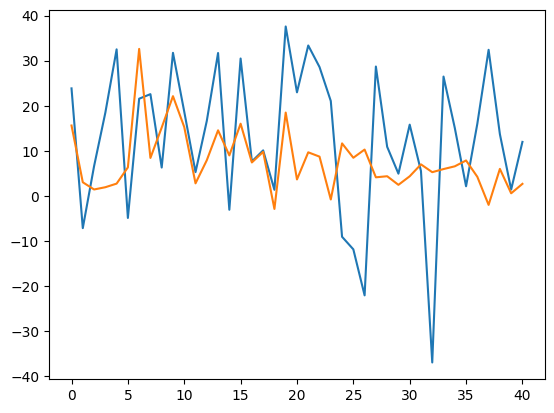

In [12]:
plt.plot(example.SP500)
plt.plot(example.AGG)

In [13]:
# Sharpe ratio over the years
print(example["SP500"].mean() / example["SP500"].std())
print(example["AGG"].mean() / example["AGG"].std())


0.7794899048894224
1.131502585582667


In [23]:
# Sharpe ratio about simple strategies between S&P500 and AGG (approximately)

strategies = pd.DataFrame()
strategies["A2"] = 0.75 * example["SP500"] + 0.25 * example["AGG"]
strategies["A3"] = (example["SP500"] + example["AGG"]) / 2
strategies["A4"] = 0.25 * example["SP500"] + 0.75 * example["AGG"]
print(strategies["A2"].mean() / strategies["A2"].std())
print(strategies["A3"].mean() / strategies["A3"].std())
print(strategies["A4"].mean() / strategies["A4"].std())


0.9020713908086481
1.0749567993844713
1.2419951811440992
